<a href="https://colab.research.google.com/github/cesong2/Display-Sensor/blob/yngkyng/%EA%B8%B0%EC%B4%88%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%EB%82%B4%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

## 1. About data 

In [4]:
#Load the data
telemetry_df = pd.read_csv("/content/PdM_telemetry.csv")
errors_df = pd.read_csv("/content/PdM_errors.csv")
maint_df = pd.read_csv("/content/PdM_maint.csv")
failures_df = pd.read_csv("/content/PdM_failures.csv")
machines_df = pd.read_csv("/content/PdM_machines.csv")

In [5]:
# Explore the Data
df_dict={'PdM_telemetry':telemetry_df,'PdM_errors':errors_df,'PdM_maint':maint_df,'PdM_failures':failures_df,'PdM_machines':machines_df}

for df_name,df in df_dict.items():
 print(df_name,'\n',df.head())
 print(df_name,'\n',df.shape)

PdM_telemetry 
               datetime  machineID        volt      rotate    pressure  \
0  2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1  2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2  2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3  2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4  2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  
PdM_telemetry 
 (876100, 6)
PdM_errors 
               datetime  machineID errorID
0  2015-01-03 07:00:00          1  error1
1  2015-01-03 20:00:00          1  error3
2  2015-01-04 06:00:00          1  error5
3  2015-01-10 15:00:00          1  error4
4  2015-01-22 10:00:00          1  error4
PdM_errors 
 (3919, 3)
PdM_maint 
               datetime  machineID   comp
0  2014-06-01 06:00:00          1  comp2
1  2014-07-16 06:00:00          1  comp4
2  2

In [6]:
# find if there are null or nan values in all the data frames
for name,df in df_dict.items():
    print(name ,'\n  ',df.isnull().values.any())

PdM_telemetry 
   False
PdM_errors 
   False
PdM_maint 
   False
PdM_failures 
   False
PdM_machines 
   False


In [7]:
# find features data types
for name,df in df_dict.items():
    print(name ,'\n  ',df.dtypes)

PdM_telemetry 
   datetime      object
machineID      int64
volt         float64
rotate       float64
pressure     float64
vibration    float64
dtype: object
PdM_errors 
   datetime     object
machineID     int64
errorID      object
dtype: object
PdM_maint 
   datetime     object
machineID     int64
comp         object
dtype: object
PdM_failures 
   datetime     object
machineID     int64
failure      object
dtype: object
PdM_machines 
   machineID     int64
model        object
age           int64
dtype: object


In [8]:
# format datatime features
df_list=[telemetry_df,errors_df,maint_df,failures_df]
for df in df_list:
    df['datetime']=pd.to_datetime(df['datetime'])

In [10]:
# Get more insight of telemetry_df data
print(telemetry_df.head())
print(telemetry_df.shape)

             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  
(876100, 6)


In [12]:
# Disply statistical parameters for the telemetry variables
tele_machine_1=telemetry_df[telemetry_df['machineID']==1]
tele_machine_1.describe()

,machineID,volt,rotate,pressure,vibration
count,8761.0,8761.000000,8761.000000,8761.000000,8761.000000
mean,1.0,170.833898,446.336502,100.668306,40.586309
std,0.0,15.314388,52.224261,10.860264,5.542143
min,1.0,119.059047,215.619476,58.733724,22.666865
25%,1.0,160.382124,412.348209,93.320867,36.847203
50%,1.0,170.618459,447.704679,100.319242,40.417442
75%,1.0,180.929341,481.358342,107.377475,44.004311
max,1.0,237.938518,636.364569,155.257527,67.633435


In [14]:
#Get the correlation matrix for machine 7
correlation=tele_machine_1.corr('pearson')
correlation
    # 연관성 없음

,machineID,volt,rotate,pressure,vibration
machineID,NaN,NaN,NaN,NaN,NaN
volt,NaN,1.000000,-0.006971,-0.010136,-0.014949
rotate,NaN,-0.006971,1.000000,0.006358,0.016027
pressure,NaN,-0.010136,0.006358,1.000000,0.020471
vibration,NaN,-0.014949,0.016027,0.020471,1.000000


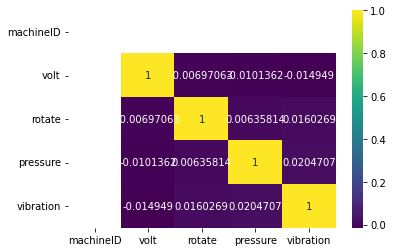

In [16]:
# heatmap for the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation, annot=True, fmt="g", cmap='viridis')
plt.show()

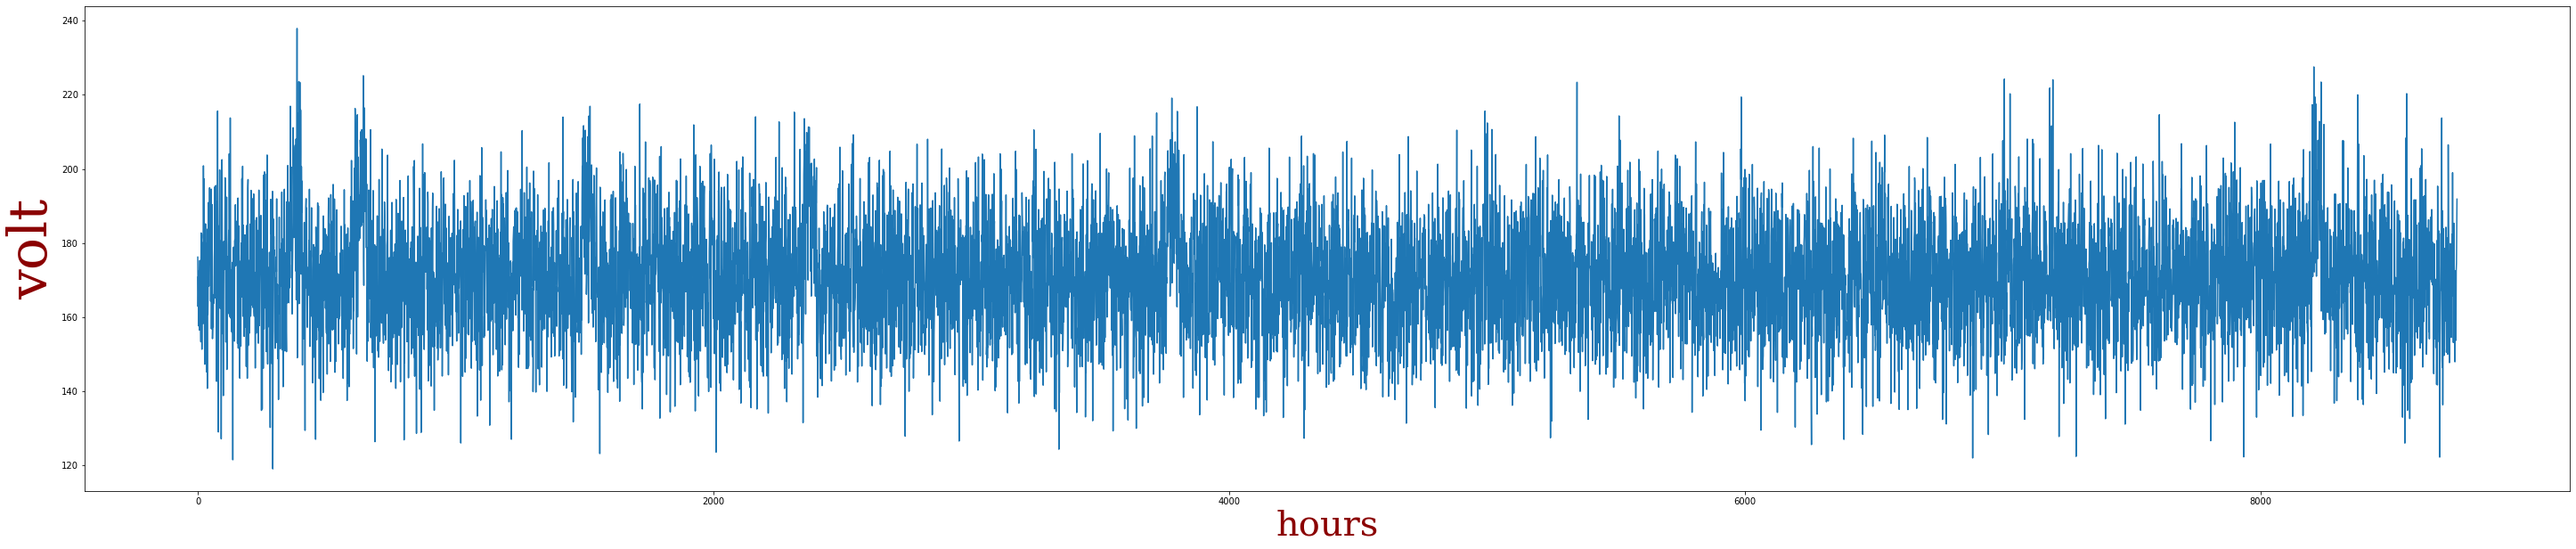

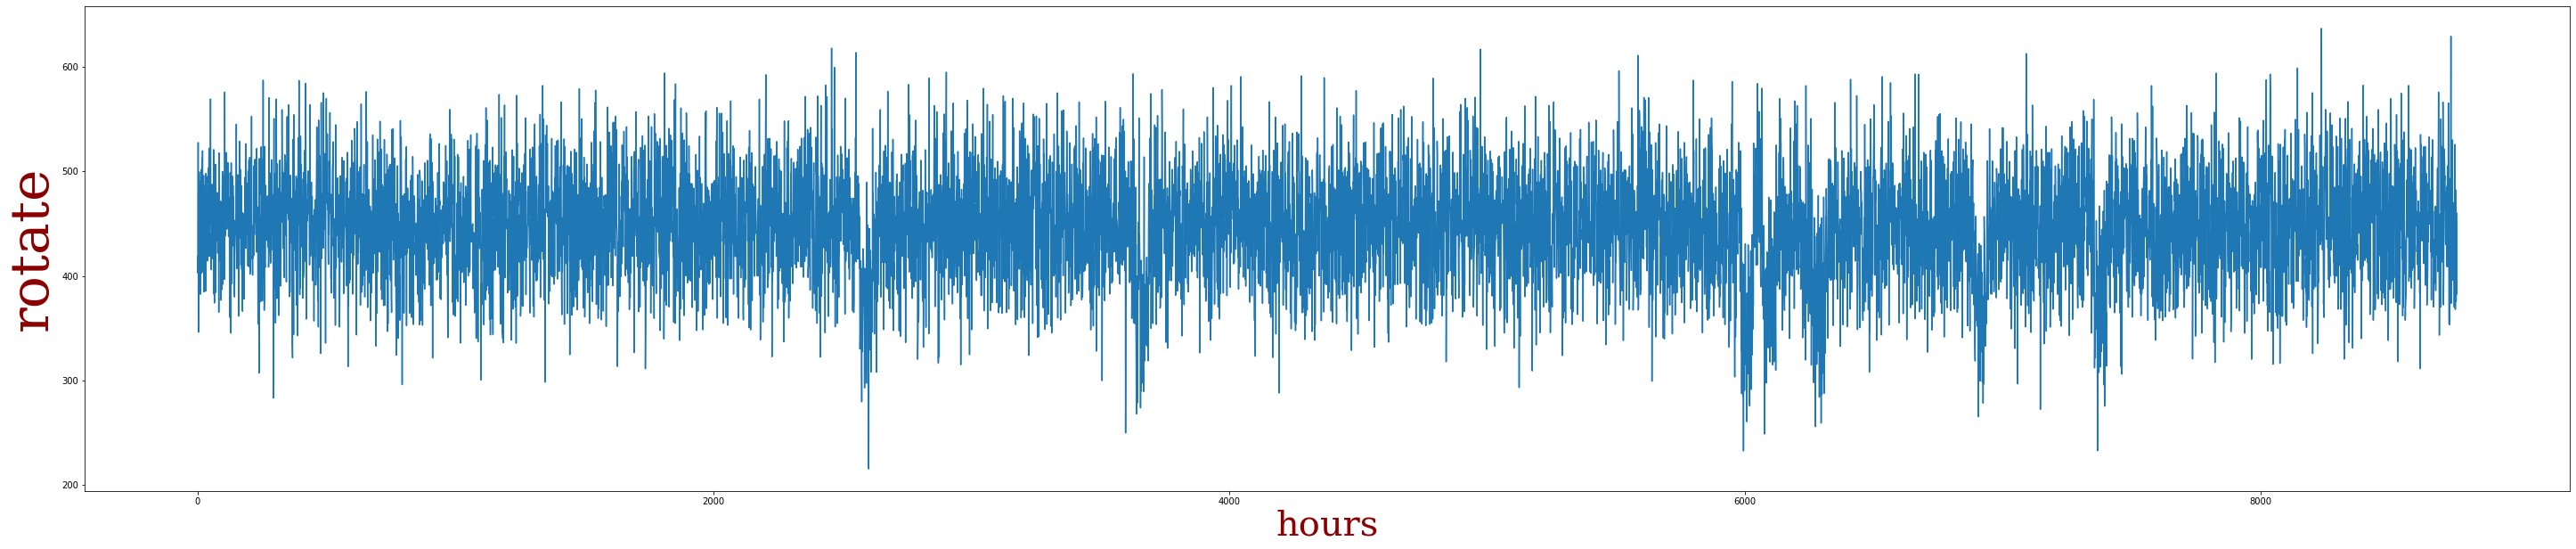

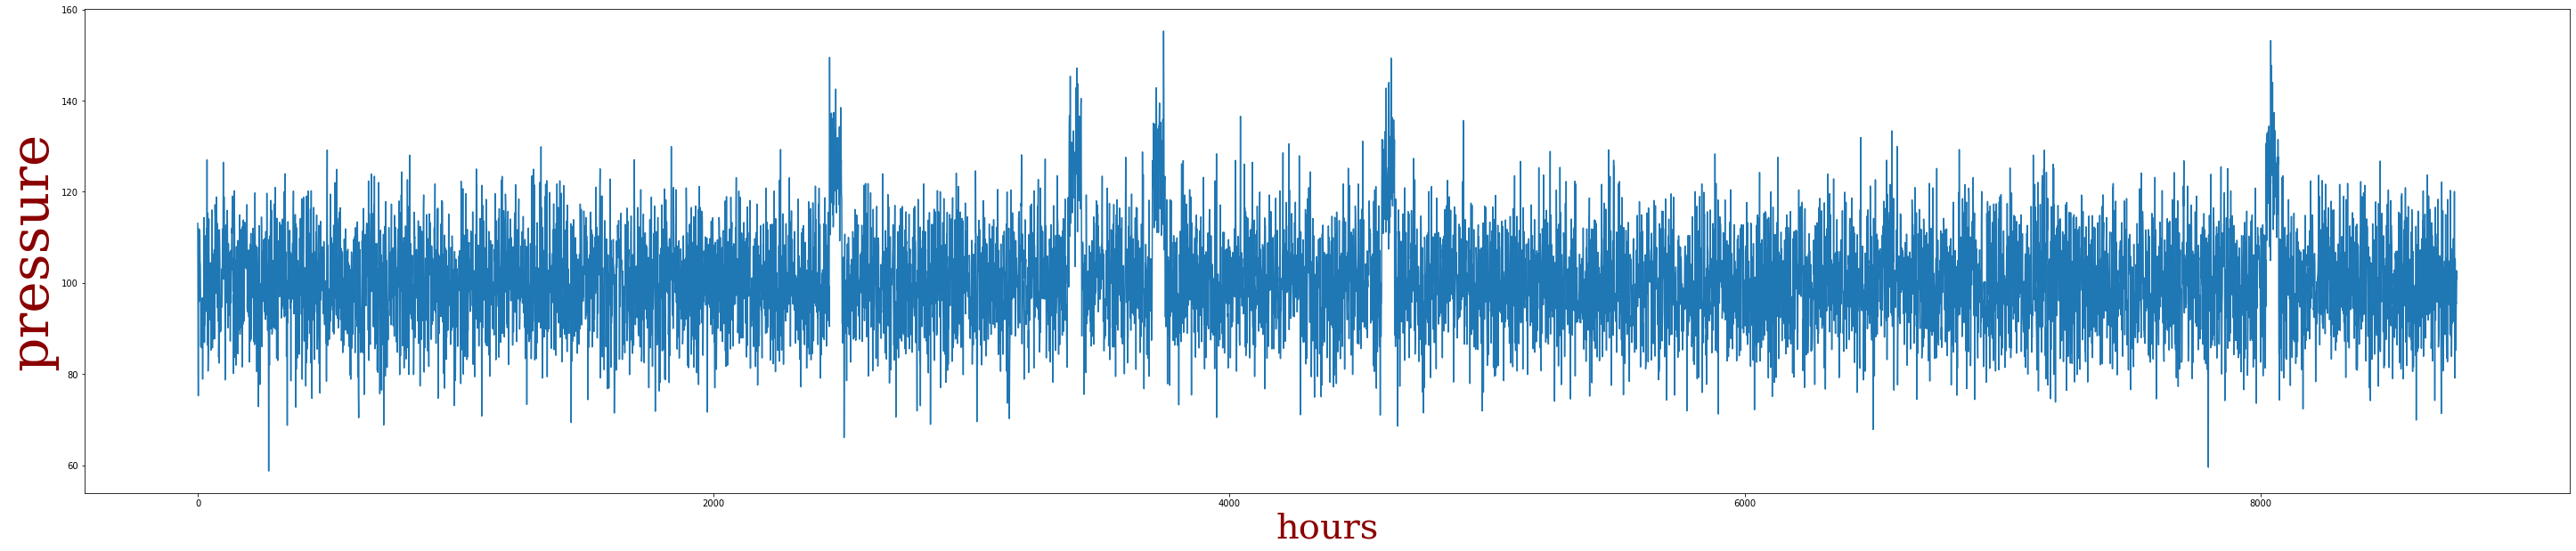

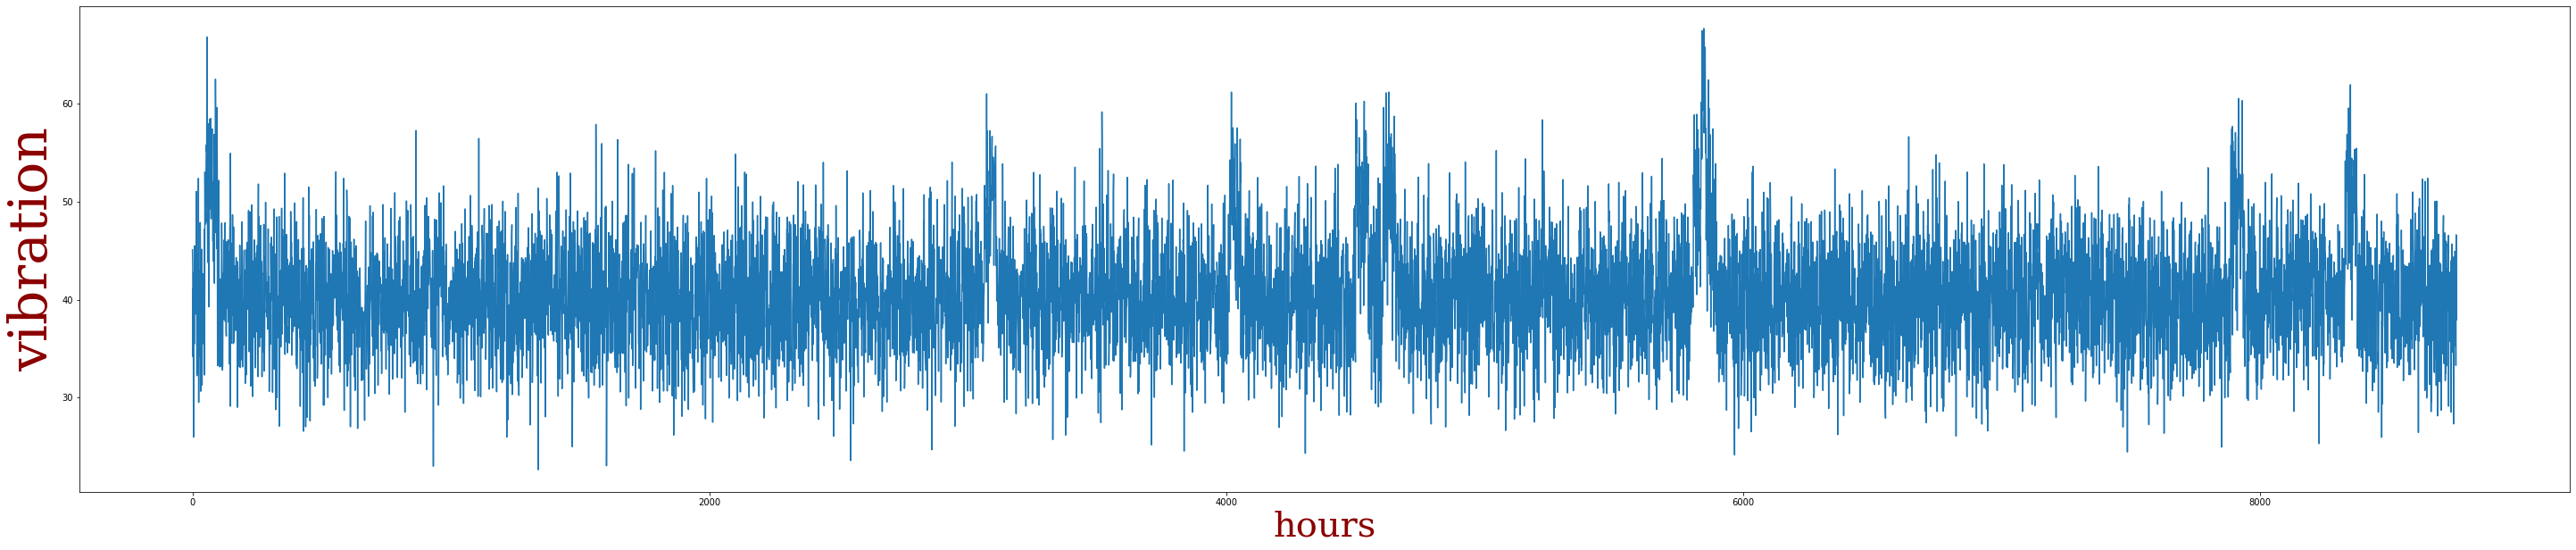

In [18]:
#Display telemetry parameters for machine number 1 for example
date_time= range(0,len(tele_machine_1))
for i in range(2,6):
 fig=plt.figure(figsize=(50,10))
 plt.plot(date_time,telemetry_df.iloc[:len(tele_machine_1),i])
 plt.ylabel(telemetry_df.columns[i],fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 60})
 plt.xlabel('hours',fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 40})


=======================================  ============================================
telemetry_df
=======================================  ============================================


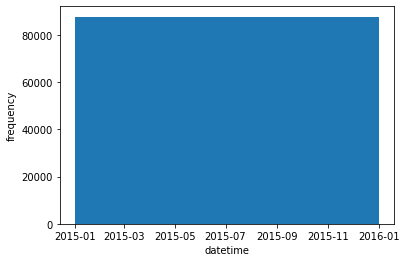

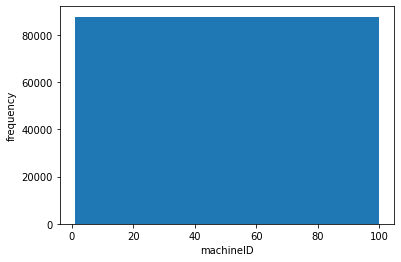

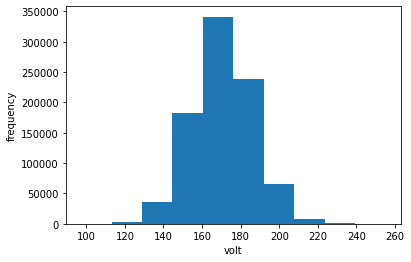

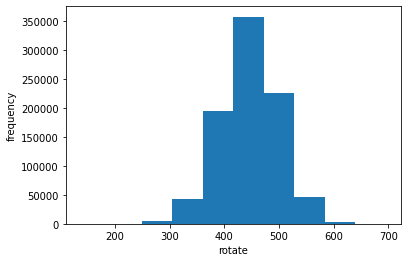

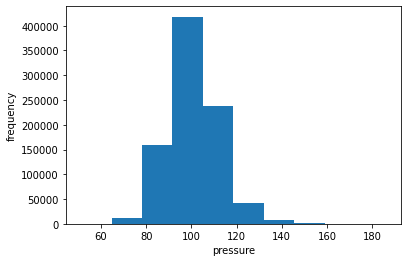

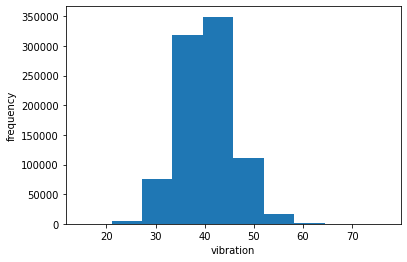

=======================================  ============================================

=======================================  ============================================
errors_df
=======================================  ============================================


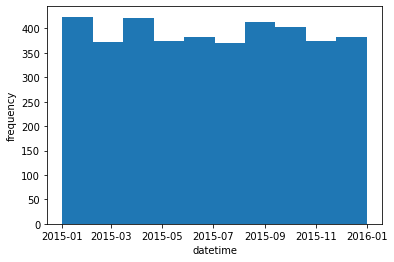

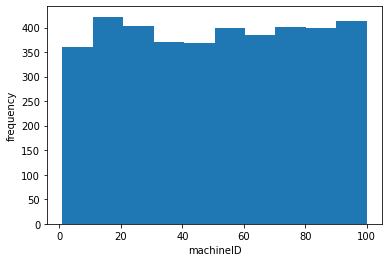

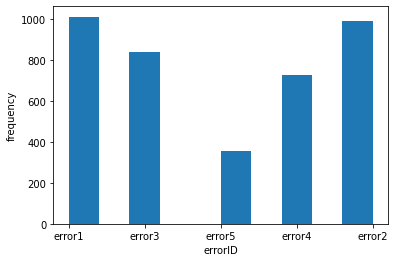

=======================================  ============================================

=======================================  ============================================
maint_df
=======================================  ============================================


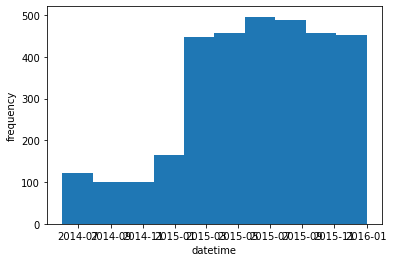

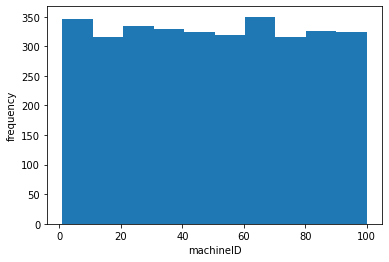

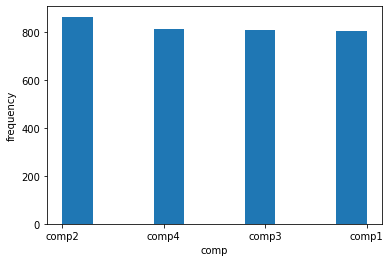

=======================================  ============================================

=======================================  ============================================
failures_df
=======================================  ============================================


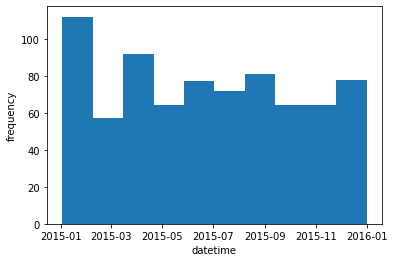

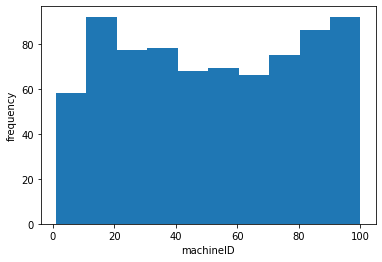

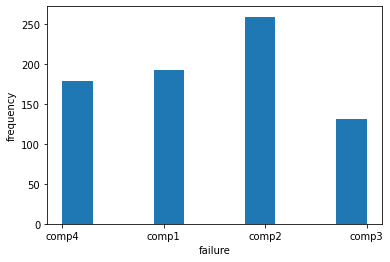

=======================================  ============================================


In [19]:
%matplotlib inline
df_list=[telemetry_df,errors_df,maint_df,failures_df]
df_list_titles=['telemetry_df','errors_df','maint_df','failures_df']
for df,df_name in zip(df_list,df_list_titles):
    
  print("\n=======================================  ============================================")
  print(df_name)
  print("=======================================  ============================================")
  for j in range(0,len(df.columns)):
    # plt.figure(figsize=(20,5))
    # plt.subplot(2,len(df.columns),j+1, sharey= True)
    plt.hist(df.iloc[:,j])
    plt.xlabel(df.columns[j])
    plt.ylabel(ylabel='frequency',) 
    plt.show()

  print("=======================================  ============================================")  

In [ ]:
"""
도출점

In PdM_telemetry.csv dataset:
모든 요소들이 정규분포를 따르는 것처럼 보임.(근데 다른 분석글에서 더 자세히 한 걸 보면 실제로는 아님) 서로 상관관계는 없음.

PdM_errors.csv dataset :
히스토그램에서 error1과 2가 많이 발생하고, 5가 가장 적음. 
따라서 1,2 오류를 줄임으로써 유지보수 시간과 비용을 절감할 수 있는 기대효과

PdM_maint.csv dataset :
4 종류 컴포넌트가 거의 같은 수로 교체됨.

PdM_failures.csv dataset:
대부분의 장애는 component-2로 인해 발생.또한 컴포넌트 2의 고장 횟수는 컴포넌트 3의 고장 횟수의 2배 이상. 
따라서 이 장애의 근본 원인을 찾아 기기 장애 사례를 최소화하는 것이 좋겠다.

PdM_machines.csv dataset:
(데이터분석 만들어야됨)
상기 상관값에서 고장 횟수는 기계연령 및 오류 횟수와 상관관계가 있음을 알 수 있다.
"""